In [61]:
import numpy as np
import pandas as pd

In [62]:
d1 = pd.read_csv("test.csv")
d1S = pd.read_csv("gender_submission.csv")
combined_data = pd.merge(d1, d1S, on='PassengerId', how='inner')

d2 = pd.read_csv("train.csv")
df = pd.concat([d2, combined_data], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [63]:
df = df.dropna(subset=['Fare', 'Embarked'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1013
Embarked          0
dtype: int64

In [64]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Survived'] = df['Survived'].map({0: False, 1: True})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df = df.astype({'Ticket': 'string', 'Cabin': 'string', 'Name': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   bool   
 2   Pclass       1306 non-null   int64  
 3   Name         1306 non-null   string 
 4   Sex          1306 non-null   int64  
 5   Age          1306 non-null   float64
 6   SibSp        1306 non-null   int64  
 7   Parch        1306 non-null   int64  
 8   Ticket       1306 non-null   string 
 9   Fare         1306 non-null   float64
 10  Cabin        293 non-null    string 
 11  Embarked_Q   1306 non-null   bool   
 12  Embarked_S   1306 non-null   bool   
dtypes: bool(3), float64(2), int64(5), string(3)
memory usage: 116.1 KB


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

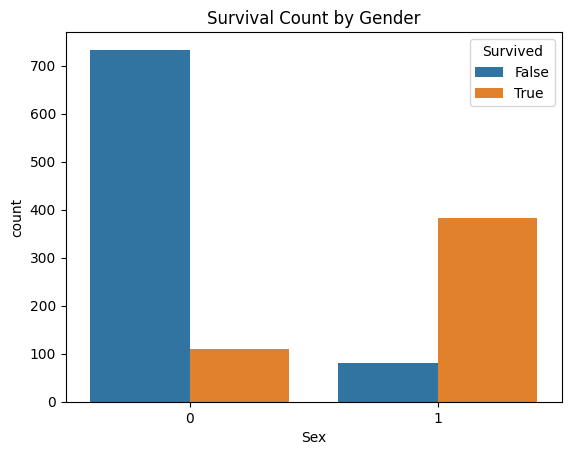

In [66]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.show()

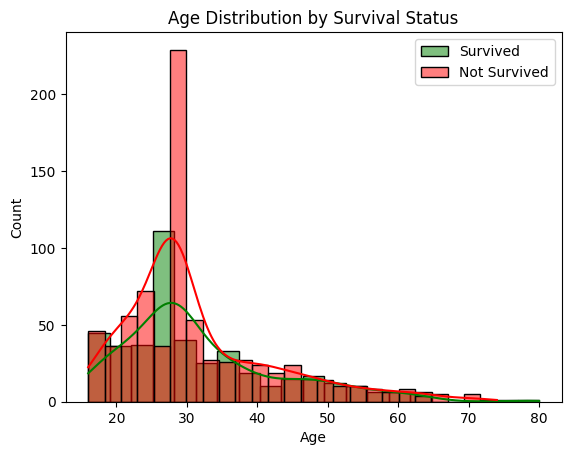

In [67]:
df_filtered = df[df['Age'] >= 16]
sns.histplot(df_filtered[df_filtered['Survived'] == 1]['Age'], color="green", label="Survived", kde=True)
sns.histplot(df_filtered[df_filtered['Survived'] == 0]['Age'], color="red", label="Not Survived", kde=True)
plt.legend()
plt.title("Age Distribution by Survival Status")
plt.show()

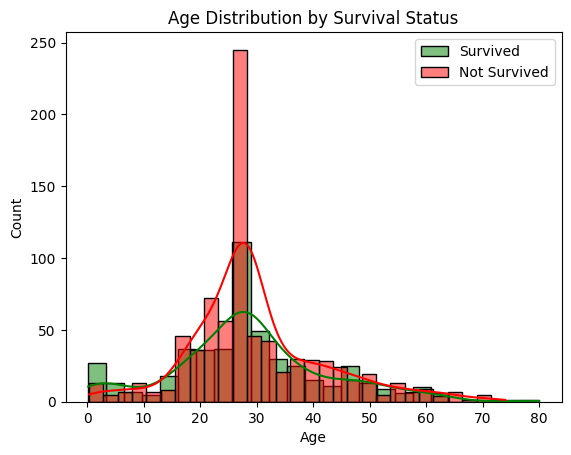

In [68]:
sns.histplot(df[df['Survived'] == 1]['Age'], color="green", label="Survived", kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], color="red", label="Not Survived", kde=True)
plt.legend()
plt.title("Age Distribution by Survival Status")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Model initialization
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8320610687022901
              precision    recall  f1-score   support

       False       0.86      0.86      0.86       157
        True       0.79      0.79      0.79       105

    accuracy                           0.83       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.83      0.83      0.83       262



In [74]:
matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", matrix)

score = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", score)

Confusion Matrix:
 [[135  22]
 [ 22  83]]
ROC AUC Score: 0.8251744009705793


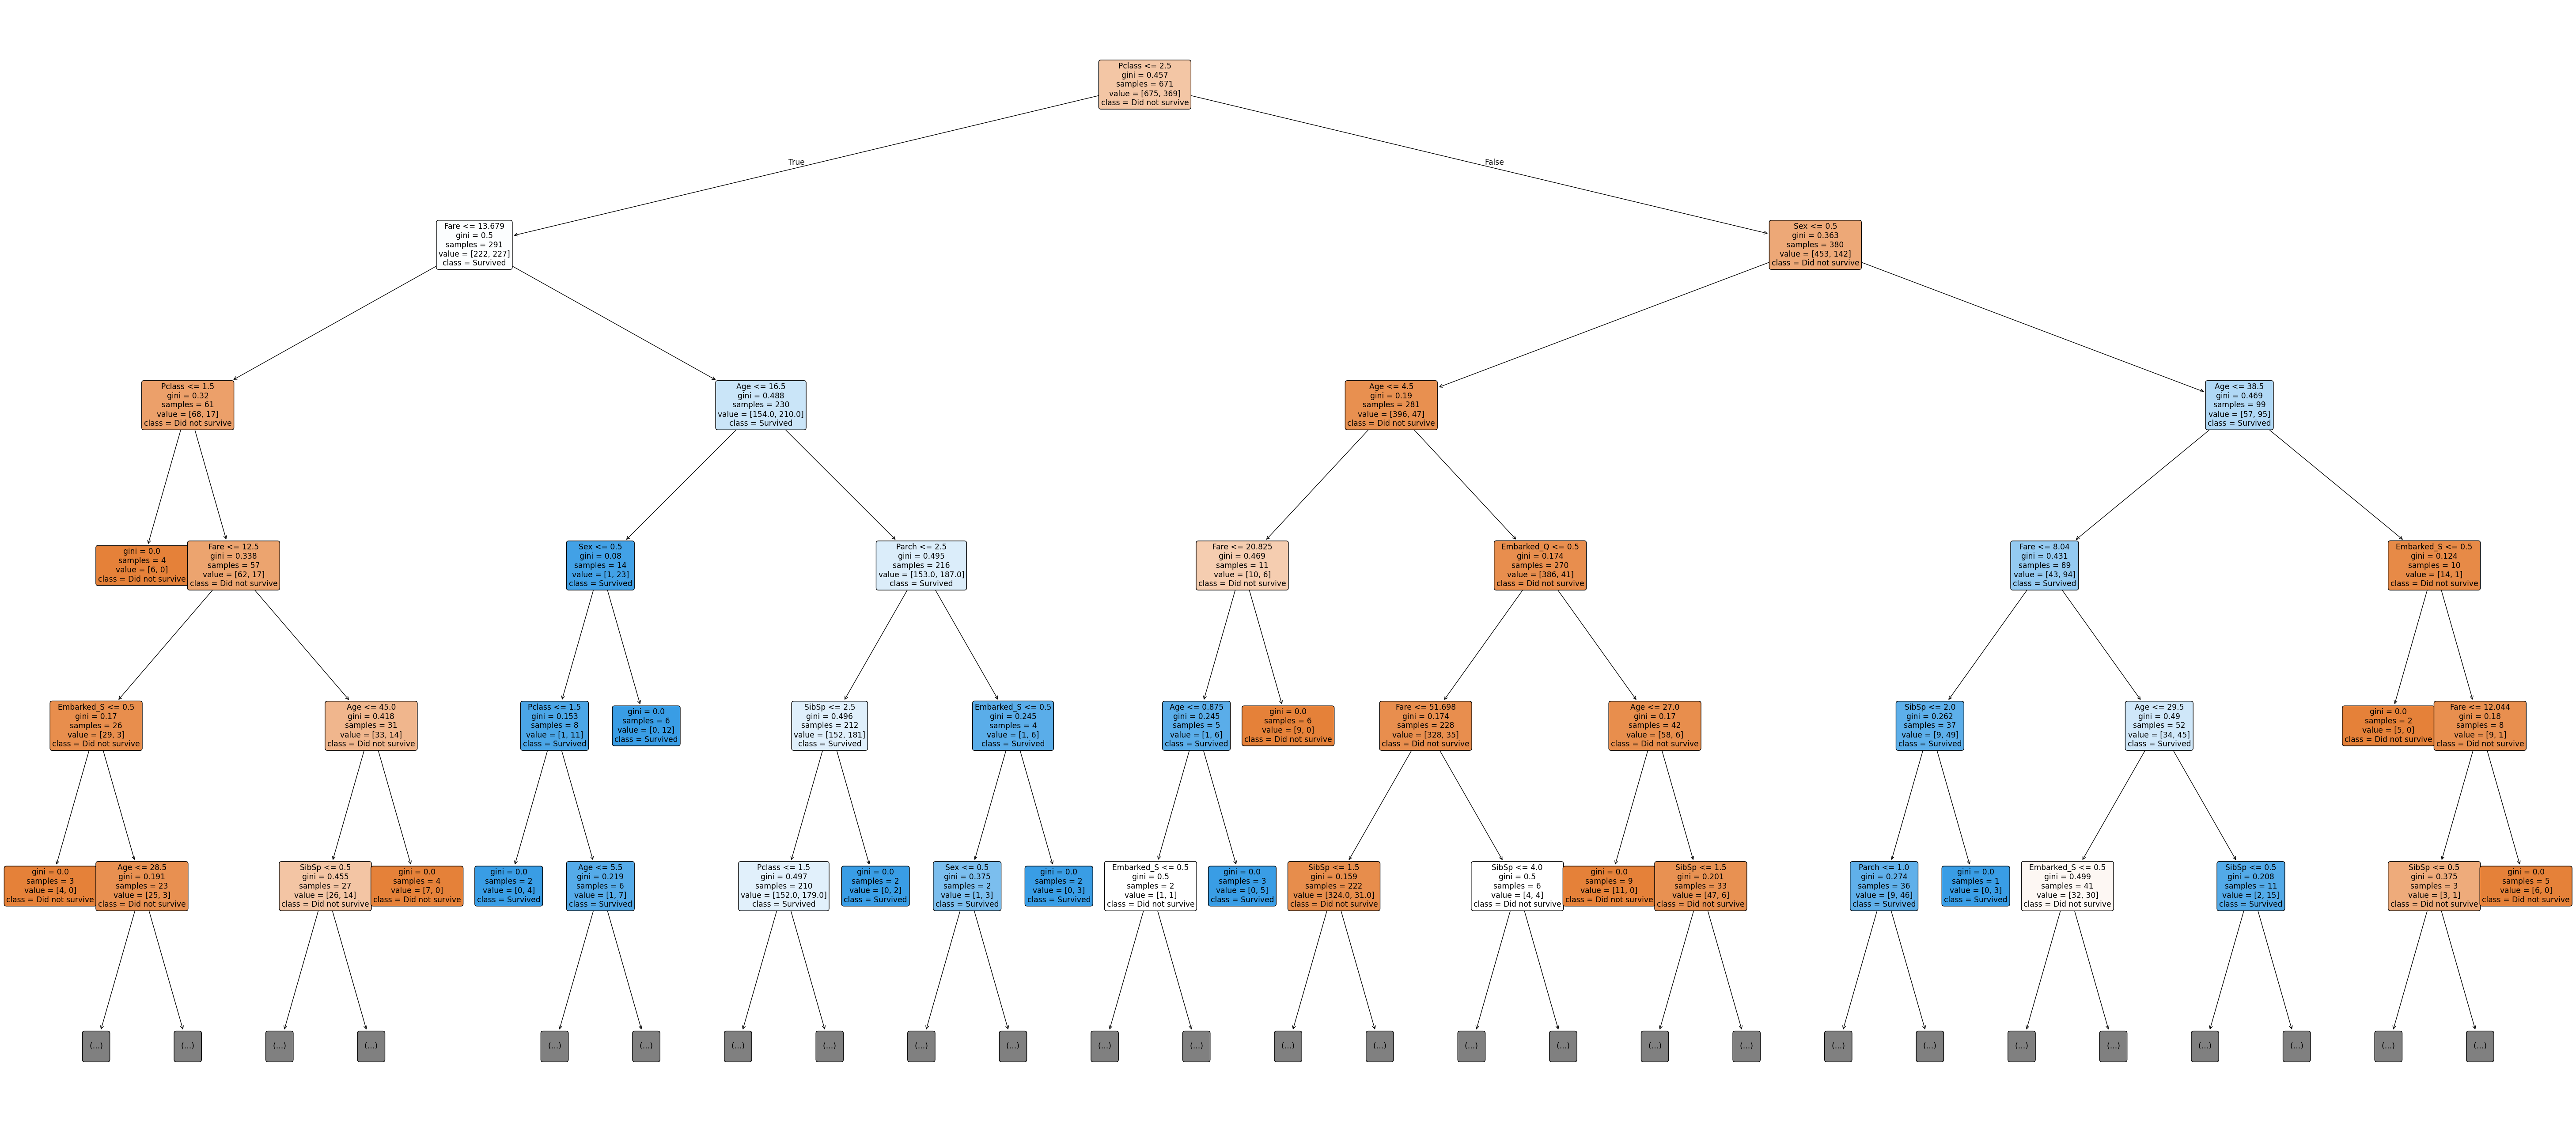

In [94]:
from sklearn.tree import plot_tree

final_tree = model.estimators_[-1]
plt.figure(figsize=(75, 33))
plot_tree(final_tree, feature_names=X.columns, class_names=['Did not survive', 'Survived'], filled=True, rounded=True, max_depth=5)
plt.show()